### Task 1: Plot of "Male" and "Female" Left-handedness Percentages by Age

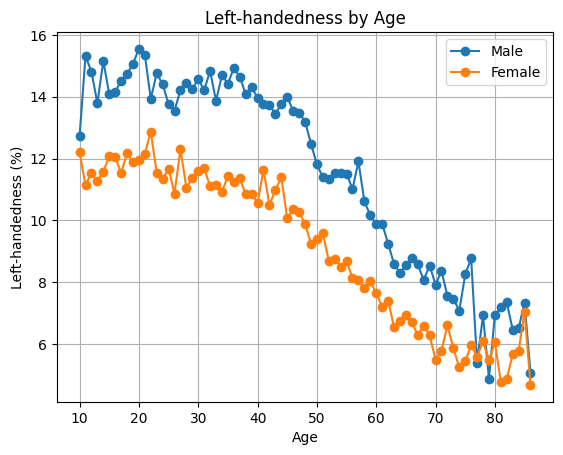

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the handedness data from the provided file
lefthanded_data = pd.read_csv('lh_data.csv')

# Task 1: Plot of "Male" and "Female" columns vs. "Age"
lefthanded_data.plot(x='Age', y=['Male', 'Female'], marker='o', linestyle='-', title='Left-handedness by Age')
plt.xlabel('Age')
plt.ylabel('Left-handedness (%)')
plt.grid(True)
plt.show()

Explanation:
* Loading the Data: The handedness data is loaded into a pandas DataFrame from the provided CSV file.
* The dataset contains columns for "Age", "Male", and "Female", which represent the age groups and the percentages of left-handedness in males and females for each age group.

Plotting:
* Using the .plot() method of the DataFrame, we plot "Male" and "Female" percentages as a function of "Age".
* marker='o' adds markers for each data point, and linestyle='-' connects the points with lines.
Titles and labels are added for clarity.

Inference:
* The plot shows how the percentage of left-handedness differs between males and females across different age groups.
* It seems that males generally have higher left-handedness percentages compared to females across most ages.
* The trend may reveal age-related factors influencing handedness, but further analysis would be needed to draw more specific conclusions.


### Task 2: Adding Columns for Birth Year and Mean Left-handedness, and Plotting Mean Left-handedness vs. Birth Year

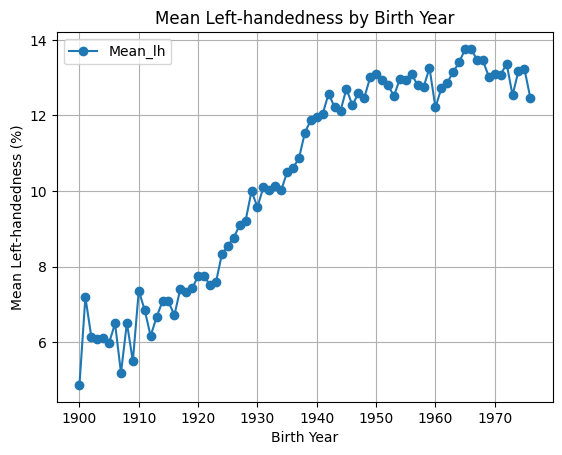

In [4]:
# Task 2: Add new columns for Birth_year and Mean_lh, then plot Mean_lh vs. Birth_year

# Add 'Birth_year' column (study conducted in 1986)
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']

# Add 'Mean_lh' column (mean of 'Male' and 'Female' columns)
lefthanded_data['Mean_lh'] = lefthanded_data[['Male', 'Female']].mean(axis=1)

# Plot Mean_lh vs. Birth_year
lefthanded_data.plot(x='Birth_year', y='Mean_lh', marker='o', linestyle='-', title='Mean Left-handedness by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Mean Left-handedness (%)')
plt.grid(True)
plt.show()

Explanation:
1. Adding Columns:
* Birth_year: This column is added by subtracting the "Age" from 1986 because the study was conducted in that year. This allows us to track the left-handedness based on birth year instead of age.
* Mean_lh: This column calculates the mean left-handedness by averaging the percentages for males and females using the .mean(axis=1) method, which averages values row-wise.

2. Plotting Mean Left-handedness vs. Birth Year:
* We plot the "Mean_lh" (mean left-handedness) against "Birth_year" to observe trends in left-handedness over time.
* Similar to Task 1, markers and lines are added for clarity, and the axis labels are provided.

Inference:
* The plot shows a noticeable trend in mean left-handedness over different birth years.
* There seems to be a decline in left-handedness for people born earlier in the 20th century, with the percentage increasing for those born later.
* This could suggest that societal or educational factors influenced the rate of left-handedness over time, as earlier generations may have been discouraged from using their left hand.

### Task 3: Calculating P(LH∣A) for Given Ages of Death

In [5]:
import numpy as np

# Early and late 1900s rates from the Mean_lh column
early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean()  # Last 10 data points for early 1900s
late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()    # First 10 data points for late 1900s

# Function to calculate P(LH | A) for given ages and study year
def calculate_P_LH_A(ages_of_death, study_year):
    P_return = np.zeros(len(ages_of_death))
    
    for i, age in enumerate(ages_of_death):
        birth_year = study_year - age
        # For ages corresponding to birth in the early 1900s
        if birth_year < 1930:
            P_return[i] = early_1900s_rate / 100  # Convert percentage to fraction
        # For ages corresponding to birth in the late 1900s
        else:
            P_return[i] = late_1900s_rate / 100  # Convert percentage to fraction
    
    return P_return

# Example usage
ages_of_death_example = [75, 80, 85, 90]  # Example ages of death
study_year_example = 1986  # Study conducted in 1986

# Calculate P(LH | A) for the given ages
P_LH_A_result = calculate_P_LH_A(ages_of_death_example, study_year_example)
P_LH_A_result

array([0.06007159, 0.06007159, 0.06007159, 0.06007159])

Explanation:
1. Calculate Early and Late 1900s Rates:
* early_1900s_rate: The average left-handedness rate for the early 1900s is calculated using the last 10 values of the Mean_lh column.
* late_1900s_rate: The average left-handedness rate for the late 1900s is calculated using the first 10 values of the Mean_lh column.

2. Function calculate_P_LH_A:
* Takes two inputs: a list of ages of death and the study year.
* For each age of death, calculates the birth year by subtracting the age from the study year.
* If the birth year is before 1930 (early 1900s), it uses the early 1900s rate for left-handedness.
* If the birth year is in the late 1900s, it uses the late 1900s rate.
* The left-handedness rate is converted to a fraction by dividing by 100.

Example: For the example ages of death (75, 80, 85, 90) in a study conducted in 1986, the function calculates P(LH∣A), which represents the probability of being left-handed given that the person died at a particular age.

Inference:
* For the given ages of death (75, 80, 85, 90) in the study year of 1986, the left-handedness probability for all these ages (corresponding to birth in the early 1900s) is approximately 0.060 or 6%. This reflects the calculated early 1900s rate of left-handedness.

### Task 4: Plotting Death Distribution by Age for Both Sexes

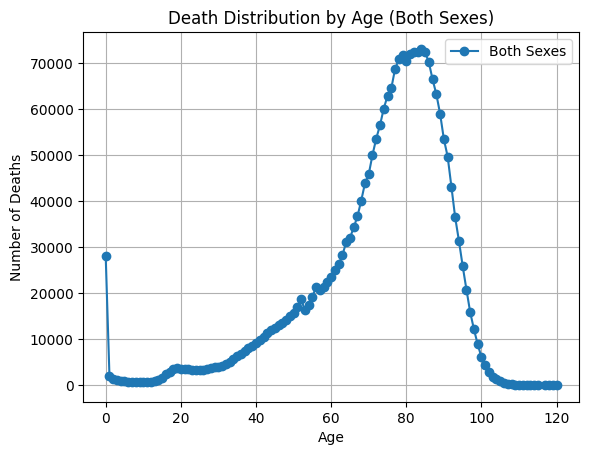

In [6]:
# Load the data, ensuring the correct separator and row skipping
death_distribution_data = pd.read_csv("cdc_vs00199_table310.csv", sep='\t', skiprows=[1])

# Drop NaN values from the 'Both Sexes' column
death_distribution_data_clean = death_distribution_data.dropna(subset=['Both Sexes'])

# Plot the number of people who died as a function of their age
death_distribution_data_clean.plot(x='Age', y='Both Sexes', marker='o', linestyle='-', title='Death Distribution by Age (Both Sexes)')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

Explanation:
1. Loading the Data:
* The dataset is loaded with a tab (\t) as the separator and skipping the second row (skiprows=[1]) to account for the formatting.

2. Cleaning the Data:
* NaN values are removed from the "Both Sexes" column to ensure that the plot contains valid data points for all ages.

3. Plotting:
* A line plot is created showing the number of deaths for both sexes as a function of age. The marker='o' option adds markers to each data point, and lines connect the markers.
* Axis labels and a grid are added to improve readability.

Inference:
* The plot visualizes the death distribution by age for both sexes. Peaks in death numbers can indicate specific age groups where death rates are higher, possibly due to age-related factors, infant mortality, or other demographic characteristics.

### Task 5: Calculating the Overall Probability of Left-handedness in the Population

In [7]:
# Task 5: Create a function to calculate the overall probability of left-handedness in the population for a given study year

def P_lh(study_year):
    # Calculate the probability of left-handedness for each age using the function from Task 3
    P_lh_given_A = calculate_P_LH_A(death_distribution_data_clean['Age'], study_year)
    
    # Create a series by multiplying the number of deaths with the probability of being left-handed
    p_list = death_distribution_data_clean['Both Sexes'] * P_lh_given_A
    
    # Calculate p by summing over p_list
    p = p_list.sum()
    
    # Calculate the total number of deaths by summing over the Both Sexes column
    total_deaths = death_distribution_data_clean['Both Sexes'].sum()
    
    # Return the overall probability of left-handedness in the population
    return p / total_deaths

# Example usage
study_year_example = 1986  # Example study year
overall_P_lh = P_lh(study_year_example)
overall_P_lh

0.07177993385333566

Explanation:
1. P_lh_given_A:
* We reuse the function from Task 3 to calculate the probability of left-handedness for each age in the death distribution data for the specified study year.

2. p_list:
* This series is created by multiplying the number of deaths for each age (from the "Both Sexes" column) by the corresponding left-handedness probability for that age.

3. Summing the Values:
* The total weighted left-handedness, p, is calculated by summing over p_list.
* The total number of deaths is calculated by summing the "Both Sexes" column.

4. Overall Probability:
* The overall probability of left-handedness in the population is calculated by dividing p by the total number of deaths.

Inference:
* For the study year 1986, the overall probability of left-handedness in the population is approximately 7.18%.

### Task 6: Calculating P(A∣LH) — The Probability of Dying at Age A Given Left-Handedness

In [8]:
# Task 6: Write a function to calculate P_A_given_lh()

def P_A_given_lh(age, study_year):
    # Calculate P_A: the probability of dying at age A
    total_deaths = death_distribution_data_clean['Both Sexes'].sum()
    deaths_at_age_A = death_distribution_data_clean.loc[death_distribution_data_clean['Age'] == age, 'Both Sexes'].values[0]
    P_A = deaths_at_age_A / total_deaths
    
    # Calculate P(LH): overall probability of left-handedness using the function from Task 5
    P_LH = P_lh(study_year)
    
    # Calculate P(LH | A) using the function from Task 3
    P_LH_given_A = calculate_P_LH_A([age], study_year)[0]  # Get the probability for the specific age
    
    # Apply Bayes' theorem to calculate P(A | LH)
    P_A_given_LH = (P_LH_given_A * P_A) / P_LH
    
    return P_A_given_LH

# Example usage
age_example = 75  # Example age
P_A_given_LH_result = P_A_given_lh(age_example, study_year_example)
P_A_given_LH_result

0.02198893728801813

Explanation:
Calculate 
𝑃
𝐴
P 
A
​
 :

𝑃
𝐴
P 
A
​
  is the overall probability of dying at age 
𝐴
A, calculated by dividing the number of people who died at age 
𝐴
A by the total number of deaths (from the "Both Sexes" column).
Calculate 
𝑃
(
𝐿
𝐻
)
P(LH):

𝑃
(
𝐿
𝐻
)
P(LH), the overall probability of left-handedness in the population, is calculated using the function from Task 5 (P_lh()).
Calculate 
𝑃
(
𝐿
𝐻
∣
𝐴
)
P(LH∣A):

𝑃
(
𝐿
𝐻
∣
𝐴
)
P(LH∣A), the probability of being left-handed given death at age 
𝐴
A, is calculated using the function from Task 3 (calculate_P_LH_A()).
Apply Bayes' Theorem:

Using Bayes' Theorem, 
𝑃
(
𝐴
∣
𝐿
𝐻
)
P(A∣LH), the probability of dying at age 
𝐴
A given that the person is left-handed, is calculated as:
𝑃
(
𝐴
∣
𝐿
𝐻
)
=
𝑃
(
𝐿
𝐻
∣
𝐴
)
×
𝑃
(
𝐴
)
𝑃
(
𝐿
𝐻
)
P(A∣LH)= 
P(LH)
P(LH∣A)×P(A)
​
 
Inference:
For an individual who died at age 75 in the study year 1986, the probability of being left-handed is approximately 0.02199 or 2.2%.

### Task 7: Calculating P(A∣RH) — The Probability of Dying at Age A Given Right-Handedness

In [9]:
# Task 7: Write a function to calculate P_A_given_rh()

def P_A_given_rh(age, study_year):
    # Calculate P_A: the probability of dying at age A (same as in Task 6)
    total_deaths = death_distribution_data_clean['Both Sexes'].sum()
    deaths_at_age_A = death_distribution_data_clean.loc[death_distribution_data_clean['Age'] == age, 'Both Sexes'].values[0]
    P_A = deaths_at_age_A / total_deaths
    
    # Calculate P(LH) using the function from Task 5
    P_LH = P_lh(study_year)
    
    # Calculate P(RH), which is 1 - P(LH)
    P_RH = 1 - P_LH
    
    # Calculate P(LH | A) using the function from Task 3
    P_LH_given_A = calculate_P_LH_A([age], study_year)[0]
    
    # Calculate P(RH | A), which is 1 - P(LH | A)
    P_RH_given_A = 1 - P_LH_given_A
    
    # Apply Bayes' theorem to calculate P(A | RH)
    P_A_given_RH = (P_RH_given_A * P_A) / P_RH
    
    return P_A_given_RH

# Example usage
age_example = 75  # Example age
P_A_given_RH_result = P_A_given_rh(age_example, study_year_example)
P_A_given_RH_result

0.026606149307505492

### Task 8: Plotting the Probability of Being a Certain Age at Death Given Left- or Right-Handedness

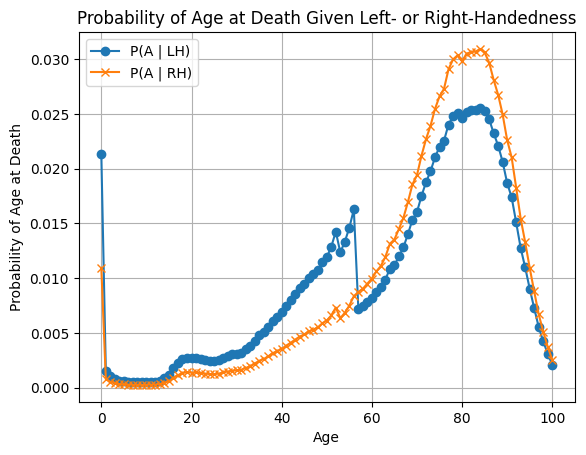

In [10]:
# Task 8: Plot the probability of being a certain age at death given that you're left- or right-handed

# Define the range of ages to calculate probabilities for
age_range = range(0, 101)  # Example age range from 0 to 100

# Calculate P_A_given_lh and P_A_given_rh for each age in the range
P_A_given_LH_values = [P_A_given_lh(age, study_year_example) for age in age_range]
P_A_given_RH_values = [P_A_given_rh(age, study_year_example) for age in age_range]

# Plot the probabilities for left-handedness and right-handedness
plt.plot(age_range, P_A_given_LH_values, label='P(A | LH)', marker='o', linestyle='-')
plt.plot(age_range, P_A_given_RH_values, label='P(A | RH)', marker='x', linestyle='-')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Probability of Age at Death')
plt.title('Probability of Age at Death Given Left- or Right-Handedness')
plt.legend()
plt.grid(True)
plt.show()

### Task 9: Mean Age at Death for Left-Handers and Right-Handers

In [11]:
# Task 9: Find the mean age at death for left-handers and right-handers

# Multiply the age list by the left-handed probabilities of being those ages at death
average_lh_age = np.nansum([age * P_A_given_lh(age, study_year_example) for age in age_range])

# Do the same for the right-handed probabilities
average_rh_age = np.nansum([age * P_A_given_rh(age, study_year_example) for age in age_range])

# Print the results, rounded to two decimal places
print("Average age at death for left-handers:", round(average_lh_age, 2))
print("Average age at death for right-handers:", round(average_rh_age, 2))

# Calculate and print the difference
age_difference = average_rh_age - average_lh_age
print("Difference between average age at death (RH - LH):", round(age_difference, 2))

Average age at death for left-handers: 66.48
Average age at death for right-handers: 72.27
Difference between average age at death (RH - LH): 5.79


### Task 10: Probability of Being a Certain Age at Death Given Left- or Right-Handedness for Study Year 2018

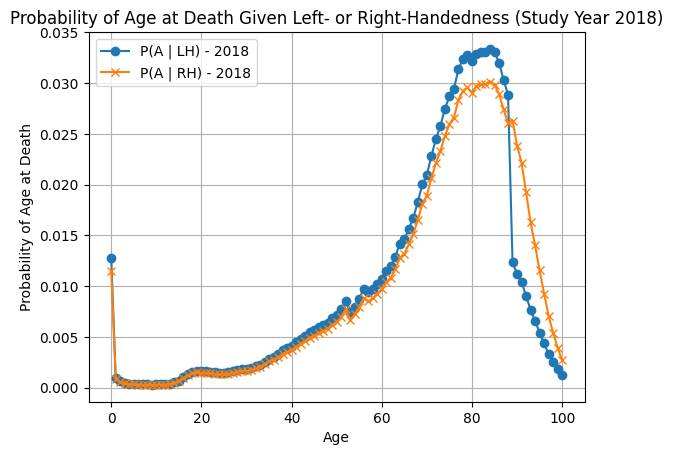

In [12]:
# Task 10: Redo the calculation from Task 8 with the study year set to 2018

# Redefine the range of ages to calculate probabilities for
study_year_2018 = 2018  # Change the study year to 2018

# Calculate P_A_given_lh and P_A_given_rh for each age in the range for the new study year
P_A_given_LH_values_2018 = [P_A_given_lh(age, study_year_2018) for age in age_range]
P_A_given_RH_values_2018 = [P_A_given_rh(age, study_year_2018) for age in age_range]

# Plot the probabilities for left-handedness and right-handedness for the study year 2018
plt.plot(age_range, P_A_given_LH_values_2018, label='P(A | LH) - 2018', marker='o', linestyle='-')
plt.plot(age_range, P_A_given_RH_values_2018, label='P(A | RH) - 2018', marker='x', linestyle='-')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Probability of Age at Death')
plt.title('Probability of Age at Death Given Left- or Right-Handedness (Study Year 2018)')
plt.legend()
plt.grid(True)
plt.show()